In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
#from mpl_toolkits.basemap import Basemap
import csv
import re
import seaborn as sns
from folium import plugins
from IPython.display import clear_output
%matplotlib inline

In [2]:
evictions = pd.read_csv('Eviction_Notices.csv')

C:\Users\Danny\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
evictions['File Date'] = pd.to_datetime(evictions['File Date'])

In [4]:
len(evictions)

39500

In [5]:
len(evictions[pd.isnull(evictions['Location'])])

1395

In [6]:
evictions = evictions[~pd.isnull(evictions['Location'])]

In [7]:
evictions['Location'] = [(float(x.split(',')[0][1:]), float(x.split(',')[1][1:-1])) for x in evictions['Location'] if type(x) == str]

In [8]:
evictions.sort_values('File Date',ascending=False)

Eviction ID                              Address           City State  \
27201     M182290     300 Block Of Collingwood  Street  San Francisco    CA   
27217     M182330         900 Block Of Steiner  Street  San Francisco    CA   
27145     M182328         1000 Block Of Howard  Street  San Francisco    CA   
27127     M182329         1000 Block Of Howard  Street  San Francisco    CA   
26950     M182327      400 Block Of Visitacion  Avenue  San Francisco    CA   
27199     M182331         1300 Block Of Market  Street  San Francisco    CA   
27136     M182326        1500 Block Of Oakdale  Avenue  San Francisco    CA   
27360     M182289            400 Block Of 18th  Avenue  San Francisco    CA   
26964     M182319         1900 Block Of Pierce  Street  San Francisco    CA   
27132     M182320          300 Block Of Laguna  Street  San Francisco    CA   
27133     M182241            600 Block Of Bush  Street  San Francisco    CA   
27365     M182230           600 Block Of Ellis  Street  San Francisco    CA   
27359     M182232         1300 Block Of Market  Street  San Francisco    CA   
27141     M182231        1100 Block Of Florida  Street  San Francisco    CA   
27358     M182233         1300 Block Of Market  Street  San Francisco    CA   
26954     M182234         1300 Block Of Market  Street  San Francisco    CA   
26956     M182239        900 Block Of Silliman  Street  San Francisco    CA   
26973     M182236              0 Block Of Turk  Street  San Francisco    CA   
27219     M182235        900 Block Of Silliman  Street  San Francisco    CA   
27218     M182238            200 Block Of Eddy  Street  San Francisco    CA   
27144     M182237         1100 Block Of Howard  Street  San Francisco    CA   
27206     M182240     2500 Block Of Sacramento  Street  San Francisco    CA   
26960     M182226          100 Block Of Leland  Avenue  San Francisco    CA   
26952     M182224           100 Block Of Cambon  Drive  San Francisco    CA   
27363     M182288           1200 Block Of 41st  Avenue  San Francisco    CA   
27125     M182222           400 Block Of Jones  Street  San Francisco    CA   
27126     M182223         500 Block Of Gonzalez  Drive  San Francisco    CA   
27138     M182220             400 Block Of 9th  Avenue  San Francisco    CA   
27364     M182219       1700 Block Of La Salle  Avenue  San Francisco    CA   
27210     M182267        1900 Block Of Jackson  Street  San Francisco    CA   
...           ...                                  ...            ...   ...   
23595     RE01012      900 Block Of Washington  Street  San Francisco    CA   
38271     RE01013             100 Block Of 7th  Avenue  San Francisco    CA   
6905      RE01014            0 Block Of Liebig  Street  San Francisco    CA   
19856     RE01015  1000 Block Of Treat Ave  Ave Garage  San Francisco    CA   
20901     RE00999         200 Block Of Corbett  Avenue  San Francisco    CA   
20462     RE01004            100 Block Of Capp  Street  San Francisco    CA   
33534     RE01007           1200 Block Of 25th  Avenue  San Francisco    CA   
15023     RE01002            100 Block Of Ward  Street  San Francisco    CA   
8287      RE01011        1100 Block Of Capitol  Avenue  San Francisco    CA   
25519     RE01003         500 Block Of Niagara  Avenue  San Francisco    CA   
18618     RE01008           3600 Block Of 20th  Street  San Francisco    CA   
3721      RE01009             3600 Block Of B  Mission  San Francisco    CA   
11609     RE01010        1100 Block Of Capitol  Avenue  San Francisco    CA   
2933      RE01005          100 Block Of Duboce  Avenue  San Francisco    CA   
8330      RE01031            200 Block Of Juanita  Way  San Francisco    CA   
11640     RE01000           2000 Block Of 22nd  Avenue  San Francisco    CA   
22511     RE01001           2300 Block Of 30th  Avenue  San Francisco    CA   
10376     RE01006     100 Block Of Collingwood  Street  San Francisco    CA   
9548      RE00998            200 Block Of Vidal  Drive  

In [9]:
type(evictions['File Date'][0])

pandas._libs.tslib.Timestamp

In [10]:
evictions['Day'] = evictions['File Date'].apply(lambda x: x.day)
evictions['Month'] = evictions['File Date'].apply(lambda x: x.month)
evictions['Year'] = evictions['File Date'].apply(lambda x: x.year)

In [11]:
reasons = []
count_reasons = []
for col in evictions.columns:
    if type(evictions[col][0]) == np.bool_:
        reasons.append(col)
        count_reasons.append(sum(evictions[col]))
eviction_reasons = pd.DataFrame({'Reason': reasons, 'Count': count_reasons})[['Reason', 'Count']]
eviction_reasons['Percent'] = eviction_reasons['Count'] / sum(eviction_reasons['Count']) * 100

In [12]:
reasons = list(eviction_reasons.sort_values('Count',ascending=False)['Reason'])

In [13]:
eviction_reasons.sort_values('Count',ascending=False)

Reason  Count    Percent
7             Owner Move In   9596  24.324461
1                    Breach   8395  21.280101
2                  Nuisance   6269  15.891001
11     Ellis Act WithDrawal   3716   9.419518
0               Non Payment   2248   5.698352
15            Late Payments   1562   3.959442
9       Capital Improvement   1487   3.769328
13       Roommate Same Unit   1289   3.267427
14              Other Cause   1272   3.224335
8                Demolition   1123   2.846641
3               Illegal Use    841   2.131812
6      Unapproved Subtenant    698   1.769328
17              Development    363   0.920152
5             Access Denial    300   0.760456
12         Condo Conversion    113   0.286439
4   Failure to Sign Renewal     85   0.215463
10        Substantial Rehab     77   0.195184
16         Lead Remediation      8   0.020279
18      Good Samaritan Ends      8   0.020279

In [14]:
reasons

['Owner Move In',
 'Breach',
 'Nuisance',
 'Ellis Act WithDrawal',
 'Non Payment',
 'Late Payments',
 'Capital Improvement',
 'Roommate Same Unit',
 'Other Cause',
 'Demolition',
 'Illegal Use',
 'Unapproved Subtenant',
 'Development',
 'Access Denial',
 'Condo Conversion',
 'Failure to Sign Renewal',
 'Substantial Rehab',
 'Lead Remediation',
 'Good Samaritan Ends']

In [15]:
evictions_yearly = evictions.groupby('Year')[reasons].sum()

In [16]:
evictions_yearly

Owner Move In  Breach  Nuisance  Ellis Act WithDrawal  Non Payment  \
Year                                                                       
1997         1107.0   316.0     246.0                   6.0        117.0   
1998         1493.0   303.0     240.0                  92.0        136.0   
1999          819.0   279.0     224.0                 399.0        146.0   
2000          982.0   358.0     252.0                 267.0        113.0   
2001          760.0   356.0     249.0                 194.0        102.0   
2002          523.0   236.0     240.0                 170.0         83.0   
2003          350.0   276.0     282.0                 145.0        119.0   
2004          334.0   199.0     224.0                 297.0         84.0   
2005          264.0   280.0     330.0                 283.0         88.0   
2006          222.0   277.0     278.0                 255.0         95.0   
2007          180.0   366.0     314.0                 235.0        126.0   
2008          165.0   370.0     316.0                 192.0        101.0   
2009          113.0   399.0     256.0                  48.0        111.0   
2010          117.0   435.0     290.0                  68.0         80.0   
2011          124.0   524.0     234.0                  54.0         88.0   
2012          171.0   433.0     330.0                  99.0         78.0   
2013          272.0   574.0     348.0                 231.0         72.0   
2014          311.0   701.0     388.0                 100.0        135.0   
2015          420.0   652.0     353.0                 146.0        117.0   
2016          397.0   438.0     371.0                 145.0        127.0   
2017          312.0   401.0     312.0                 179.0         82.0   
2018          160.0   222.0     192.0                 111.0         48.0   

      Late Payments  Capital Improvement  Roommate Same Unit  Other Cause  \
Year                                                                        
1997           97.0                 52.0               101.0        175.0   
1998           92.0                 27.0                81.0        150.0   
1999           94.0                 52.0               134.0         64.0   
2000           92.0                 86.0               140.0         99.0   
2001           58.0                 49.0               114.0         58.0   
2002           70.0                 61.0                79.0         16.0   
2003           56.0                 71.0                51.0         38.0   
2004           52.0                 48.0                58.0         29.0   
2005           54.0                 89.0                44.0         39.0   
2006           64.0                 77.0                50.0         49.0   
2007           77.0                 56.0                23.0         40.0   
2008           80.0                 28.0                26.0         52.0   
2009           78.0                 24.0                25.0         59.0   
2010           52.0                 22.0                33.0         72.0   
2011           46.0                 45.0                28.0         57.0   
2012           57.0                 28.0                37.0         65.0   
2013           75.0                 31.0                41.0         54.0   
2014           66.0                 42.0                57.0         40.0   
2015           92.0                 46.0                45.0         51.0   
2016          124.0                302.0                76.0         30.0   
2017           59.0                 65.0                26.0         23.0   
2018           27.0                186.0                20.0         12.0   

      Demolition  Illegal Use  Unapproved Subtenant  Development  \
Year                                                               
1997        48.0         19.0                  72.0          0.0   
1998        57.0         17.0                  97.0          0.0   
1999        46.0         25.0                 179.0         

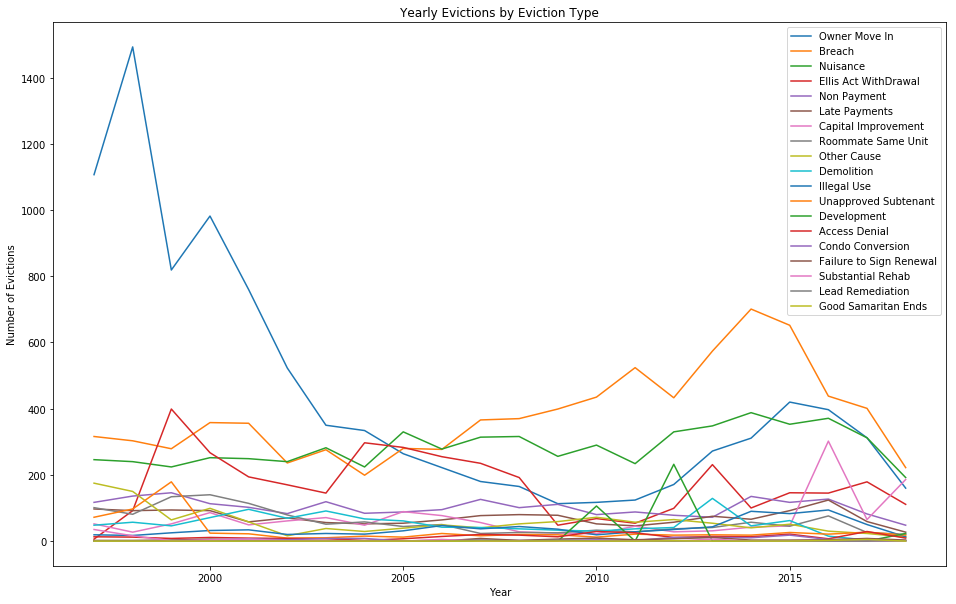

In [17]:
plt.figure(figsize = (16,10))
plt.plot(evictions_yearly[reasons])
plt.legend(reasons)
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
plt.title('Yearly Evictions by Eviction Type')
plt.show()

In [18]:
evictions['Quarterly_Date'] = evictions['Year'] + (evictions['Month'] / 3).astype(int) / 4
evictions

Eviction ID                            Address           City State  \
0         M172475     3400 Block Of Cabrillo  Street  San Francisco    CA   
1         M172687          200 Block Of Lincoln  Way  San Francisco    CA   
2         M172665      100 Block Of San Jose  Avenue  San Francisco    CA   
3         M172474        1500 Block Of Gough  Street  San Francisco    CA   
4         M172571        900 Block Of Larkin  Street  San Francisco    CA   
5         M172642      2300 Block Of Mission  Street  San Francisco    CA   
6         M172623       100 Block Of Charles  Street  San Francisco    CA   
7         M172560         1200 Block Of 40th  Avenue  San Francisco    CA   
8         M172484      1300 Block Of Clement  Street  San Francisco    CA   
9         M172684          200 Block Of Lincoln  Way  San Francisco    CA   
10        M172628     1300 Block Of Chestnut  Street  San Francisco    CA   
11        M172477     1600 Block Of Kirkwood  Avenue  San Francisco    CA   
12        M172661            0 Block Of Turk  Street  San Francisco    CA   
13        M172666  1700 Block Of North Point  Street  San Francisco    CA   
14        M172503         1200 Block Of 41st  Avenue  San Francisco    CA   
15        M172663         200 Block Of Garces  Drive  San Francisco    CA   
16        M172545       2100 Block Of Larkin  Street  San Francisco    CA   
17        M172574        1500 Block Of Jones  Street  San Francisco    CA   
18        M172554   2700 Block Of Mcallister  Street  San Francisco    CA   
19        M172686          200 Block Of Lincoln  Way  San Francisco    CA   
20        M172657         3700 Block Of 17th  Street  San Francisco    CA   
21        M172551        900 Block Of Sutter  Street  San Francisco    CA   
22        M172511             0 Block Of 5th  Avenue  San Francisco    CA   
23        M172563          100 Block Of Russ  Street  San Francisco    CA   
24        M172646       700 Block Of Dolores  Street  San Francisco    CA   
25        M172709      100 Block Of Prospect  Avenue  San Francisco    CA   
26        M172599         1400 Block Of 18th  Avenue  San Francisco    CA   
27        M172468          100 Block Of 21st  Avenue  San Francisco    CA   
28        M172561       1300 Block Of Powell  Street  San Francisco    CA   
29        M172470     400 Block Of Frederick  Street  San Francisco    CA   
...           ...                                ...            ...   ...   
39470     E980267         3300 Block Of 26th  Street  San Francisco    CA   
39471     M121268       1100 Block Of Market  Street  San Francisco    CA   
39472     M071644        500 Block Of Naples  Street  San Francisco    CA   
39473     M110571         2500 Block Of Hyde  Street  San Francisco    CA   
39474     M2K1673           0 Block Of Miller  Place  San Francisco    CA   
39475     M034327          600 Block Of Pine  Street  San Francisco    CA   
39476     RE02269      1900 Block Of Pacific  Avenue  San Francisco    CA   
39477     M150210      200 Block Of Missouri  Street  San Francisco    CA   
39478     M120648         1900 Block Of 19th  Avenue  San Francisco    CA   
39479     M051606     500 Block Of Greenwich  Street  San Francisco    CA   
39480     M010678         1300 Block Of Lyon  Street  San Francisco    CA   
39481     E982417         0 Block Of Landers  Street  San Francisco    CA   
39482     M050252      3000 Block Of Taraval  Street  San Francisco    CA   
39483     RE01364     700 Block Of Broderick  Street  San Francisco    CA   
39484     M050666         3300 Block Of 26th  Street  San Francisco    CA   
39485     M110666         3000 Block Of Clay  Street  San Francisco    CA   
39486     M011506         1700 Block Of 35th  Avenue  San Francisco    CA   
39487     S000993     100 Block Of Louisburg  Street  San Francisco    CA   
39488     M153111          0 Block Of Ottawa  Avenue  San Francisco    CA   
39489     M130627          500 Block Of 19th  Avenue  San Francisco    CA   
39

In [19]:
evictions_quarterly = evictions.groupby(['Quarterly_Date'])[reasons].sum()

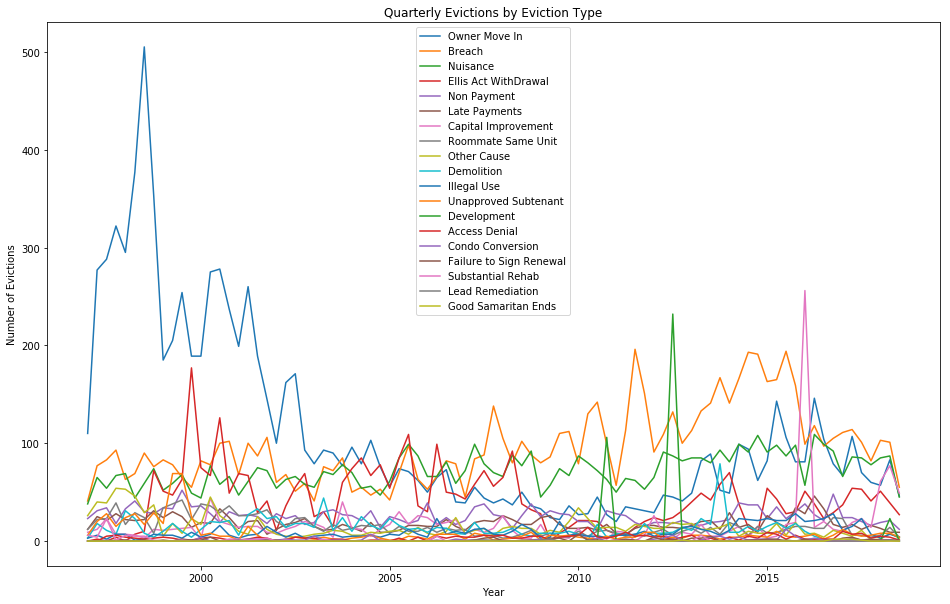

In [20]:
plt.figure(figsize = (16,10))
plt.plot(evictions_quarterly[reasons])
plt.legend(reasons)
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
plt.title('Quarterly Evictions by Eviction Type')
plt.show()

In [21]:
evictions['Monthly_Date'] = evictions['Year'] + (evictions['Month'] - 1) / 12
evictions

Eviction ID                            Address           City State  \
0         M172475     3400 Block Of Cabrillo  Street  San Francisco    CA   
1         M172687          200 Block Of Lincoln  Way  San Francisco    CA   
2         M172665      100 Block Of San Jose  Avenue  San Francisco    CA   
3         M172474        1500 Block Of Gough  Street  San Francisco    CA   
4         M172571        900 Block Of Larkin  Street  San Francisco    CA   
5         M172642      2300 Block Of Mission  Street  San Francisco    CA   
6         M172623       100 Block Of Charles  Street  San Francisco    CA   
7         M172560         1200 Block Of 40th  Avenue  San Francisco    CA   
8         M172484      1300 Block Of Clement  Street  San Francisco    CA   
9         M172684          200 Block Of Lincoln  Way  San Francisco    CA   
10        M172628     1300 Block Of Chestnut  Street  San Francisco    CA   
11        M172477     1600 Block Of Kirkwood  Avenue  San Francisco    CA   
12        M172661            0 Block Of Turk  Street  San Francisco    CA   
13        M172666  1700 Block Of North Point  Street  San Francisco    CA   
14        M172503         1200 Block Of 41st  Avenue  San Francisco    CA   
15        M172663         200 Block Of Garces  Drive  San Francisco    CA   
16        M172545       2100 Block Of Larkin  Street  San Francisco    CA   
17        M172574        1500 Block Of Jones  Street  San Francisco    CA   
18        M172554   2700 Block Of Mcallister  Street  San Francisco    CA   
19        M172686          200 Block Of Lincoln  Way  San Francisco    CA   
20        M172657         3700 Block Of 17th  Street  San Francisco    CA   
21        M172551        900 Block Of Sutter  Street  San Francisco    CA   
22        M172511             0 Block Of 5th  Avenue  San Francisco    CA   
23        M172563          100 Block Of Russ  Street  San Francisco    CA   
24        M172646       700 Block Of Dolores  Street  San Francisco    CA   
25        M172709      100 Block Of Prospect  Avenue  San Francisco    CA   
26        M172599         1400 Block Of 18th  Avenue  San Francisco    CA   
27        M172468          100 Block Of 21st  Avenue  San Francisco    CA   
28        M172561       1300 Block Of Powell  Street  San Francisco    CA   
29        M172470     400 Block Of Frederick  Street  San Francisco    CA   
...           ...                                ...            ...   ...   
39470     E980267         3300 Block Of 26th  Street  San Francisco    CA   
39471     M121268       1100 Block Of Market  Street  San Francisco    CA   
39472     M071644        500 Block Of Naples  Street  San Francisco    CA   
39473     M110571         2500 Block Of Hyde  Street  San Francisco    CA   
39474     M2K1673           0 Block Of Miller  Place  San Francisco    CA   
39475     M034327          600 Block Of Pine  Street  San Francisco    CA   
39476     RE02269      1900 Block Of Pacific  Avenue  San Francisco    CA   
39477     M150210      200 Block Of Missouri  Street  San Francisco    CA   
39478     M120648         1900 Block Of 19th  Avenue  San Francisco    CA   
39479     M051606     500 Block Of Greenwich  Street  San Francisco    CA   
39480     M010678         1300 Block Of Lyon  Street  San Francisco    CA   
39481     E982417         0 Block Of Landers  Street  San Francisco    CA   
39482     M050252      3000 Block Of Taraval  Street  San Francisco    CA   
39483     RE01364     700 Block Of Broderick  Street  San Francisco    CA   
39484     M050666         3300 Block Of 26th  Street  San Francisco    CA   
39485     M110666         3000 Block Of Clay  Street  San Francisco    CA   
39486     M011506         1700 Block Of 35th  Avenue  San Francisco    CA   
39487     S000993     100 Block Of Louisburg  Street  San Francisco    CA   
39488     M153111          0 Block Of Ottawa  Avenue  San Francisco    CA   
39489     M130627          500 Block Of 19th  Avenue  San Francisco    CA   
39

In [22]:
evictions_monthly = evictions.groupby(['Monthly_Date'])[reasons].sum()

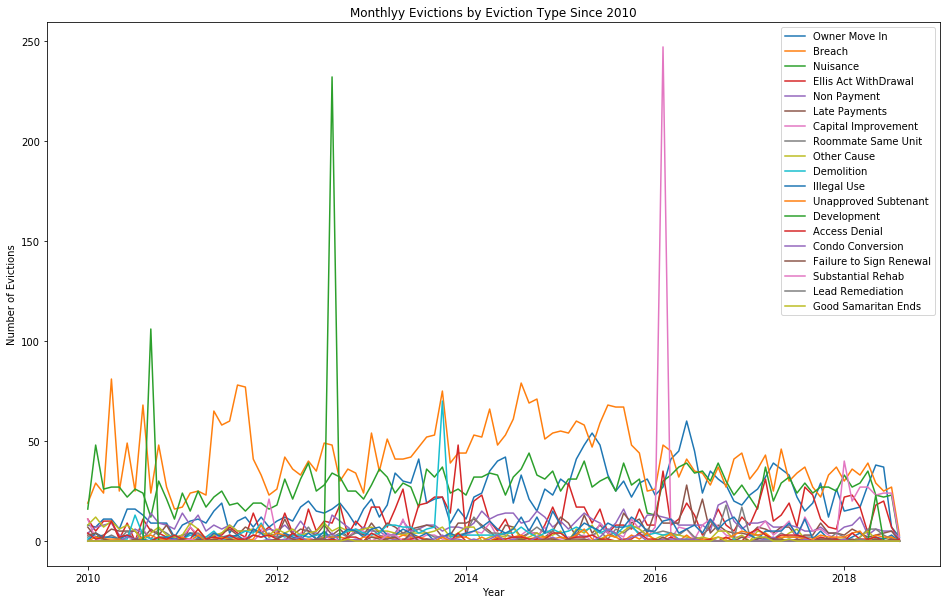

In [23]:
plt.figure(figsize = (16,10))
plt.plot(evictions_monthly[evictions_monthly.index >= 2010][reasons])
plt.legend(reasons)
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
plt.title('Monthlyy Evictions by Eviction Type Since 2010')
plt.show()

In [24]:
dev = pd.read_csv('Mayor_s_Office_of_Housing_and_Community_Development_Affordable_Rental_Portfolio.csv')

In [25]:
dev.head(5)

Project ID                                       Project Name Street Number  \
0   1969-001  Martin Luther King-Marcus Garvey Square Cooper...          1680   
1   1970-001                       Ridgeview Terrace Apartments           140   
2   1972-001                                  Sutter Apartments          1480   
3   1973-001                                 Nihonmachi Terrace          1615   
4   1980-001                               Consorcia Apartments          1204   

  Street Name Street Type Zip Code City Analysis Neighborhood  \
0        Eddy          St    94115           Western Addition   
1    Cashmere          St    94124      Bayview Hunters Point   
2      Sutter          St    94109           Western Addition   
3      Sutter          St    94109                  Japantown   
4       Mason          St    94133                  Chinatown   

  Planning Neighborhood  Supervisor District  \
0      Western Addition                    5   
1               Bayview                   10   
2      Western Addition                    2   
3      Western Addition                    5   
4              Nob Hill                    3   

                                     Project Sponsor  \
0  Martin Luther King-Marcus Garvey Square Cooper...   
1         Ridgeview Terrace Affordable Housing, Inc.   
2                                   Sutter Gough, LP   
3             Japanese American Religious Federation   
4             Chinatown Community Development Center   

              ...              50% AMI  60% AMI  80% AMI  120% AMI  \
0             ...                    0      0.0    211.0       0.0   
1             ...                   20     80.0      0.0       0.0   
2             ...                    0     67.0      0.0       0.0   
3             ...                  180     63.0      0.0       0.0   
4             ...                    0      0.0     23.0       0.0   

   More than 120% AMI  Year Building Constructed  Year Affordability Began  \
0                 0.0                       2011                      2011   
1                 0.0                       2001                      2001   
2                 0.0                       2000                      1973   
3                 0.0                       2010                      2010   
4                 0.0                       1909                      1982   

    Latitude   Longitude            Project Location  
0  37.781597 -122.434860  (37.7815971, -122.4348602)  
1  37.736706 -122.384689  (37.7367058, -122.3846893)  
2  37.787430 -122.424751  (37.7874298, -122.4247513)  
3  37.786552 -122.426796   (37.7865524, -122.426796)  
4  37.794758 -122.411201  (37.7947578, -122.4112015)  

[5 rows x 39 columns]

In [26]:
m = folium.Map(location=[37.78, -122.44])
m

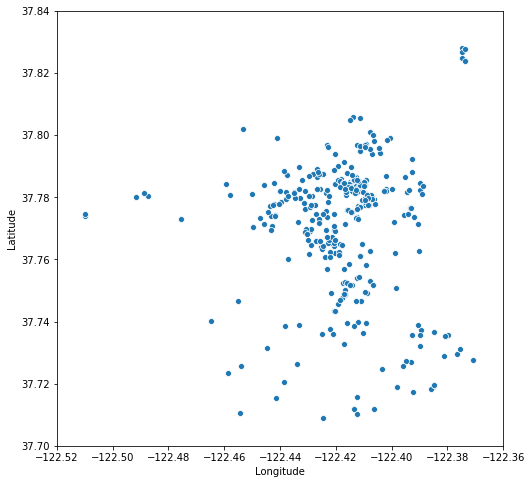

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(dev['Longitude'], dev['Latitude'])
plt.xlim([-122.52, -122.36])
plt.ylim([37.70,37.84])
plt.show()

In [28]:
evictions['Latitude'], evictions['Longitude'] = zip(*evictions['Location'])

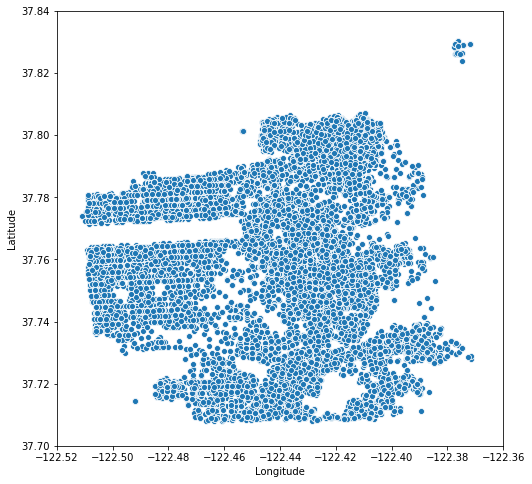

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(evictions['Longitude'], evictions['Latitude'])
plt.xlim([-122.52, -122.36])
plt.ylim([37.70,37.84])
plt.show()

In [30]:
evictions[np.round(evictions['Longitude'],5) == -122.41354]

Eviction ID                       Address           City State  \
68        M172568  1100 Block Of Market  Street  San Francisco    CA   
254       M121418  1100 Block Of Market  Street  San Francisco    CA   
258       M101329  1100 Block Of Market  Street  San Francisco    CA   
310       M111069  1100 Block Of Market  Street  San Francisco    CA   
502       M121331  1100 Block Of Market  Street  San Francisco    CA   
648       M121401  1100 Block Of Market  Street  San Francisco    CA   
744       M121399  1100 Block Of Market  Street  San Francisco    CA   
761       M101338  1100 Block Of Market  Street  San Francisco    CA   
767       M121441  1100 Block Of Market  Street  San Francisco    CA   
847       M121411  1100 Block Of Market  Street  San Francisco    CA   
943       M121280  1100 Block Of Market  Street  San Francisco    CA   
945       M050687  1100 Block Of Market  Street  San Francisco    CA   
1058      M121320  1100 Block Of Market  Street  San Francisco    CA   
1080      M101332  1100 Block Of Market  Street  San Francisco    CA   
1081      M121464  1100 Block Of Market  Street  San Francisco    CA   
1113      M121442  1100 Block Of Market  Street  San Francisco    CA   
1169      M121463  1100 Block Of Market  Street  San Francisco    CA   
1191      M111169  1100 Block Of Market  Street  San Francisco    CA   
1319      M121313  1100 Block Of Market  Street  San Francisco    CA   
1446      M101344  1100 Block Of Market  Street  San Francisco    CA   
1534      M121270  1100 Block Of Market  Street  San Francisco    CA   
1558      M121404  1100 Block Of Market  Street  San Francisco    CA   
1570      M041973  1100 Block Of Market  Street  San Francisco    CA   
1583      M121419  1100 Block Of Market  Street  San Francisco    CA   
1726      M121353  1100 Block Of Market  Street  San Francisco    CA   
1764      M121362  1100 Block Of Market  Street  San Francisco    CA   
2004      M121487  1100 Block Of Market  Street  San Francisco    CA   
2209      M081384  1100 Block Of Market  Street  San Francisco    CA   
2374      M101300  1100 Block Of Market  Street  San Francisco    CA   
2489      M101304  1100 Block Of Market  Street  San Francisco    CA   
...           ...                           ...            ...   ...   
36911     M042117  1100 Block Of Market  Street  San Francisco    CA   
36938     M051737  1100 Block Of Market  Street  San Francisco    CA   
37051     M121439  1100 Block Of Market  Street  San Francisco    CA   
37330     M121365  1100 Block Of Market  Street  San Francisco    CA   
37433     M121423  1100 Block Of Market  Street  San Francisco    CA   
37457     M101337  1100 Block Of Market  Street  San Francisco    CA   
37592     M101312  1100 Block Of Market  Street  San Francisco    CA   
37739     M121348  1100 Block Of Market  Street  San Francisco    CA   
37740     M121455  1100 Block Of Market  Street  San Francisco    CA   
38109     M101374  1100 Block Of Market  Street  San Francisco    CA   
38369     M101399  1100 Block Of Market  Street  San Francisco    CA   
38407     M101314  1100 Block Of Market  Street  San Francisco    CA   
38429     M101351  1100 Block Of Market  Street  San Francisco    CA   
38593     M121385  1100 Block Of Market  Street  San Francisco    CA   
38644     M121490  1100 Block Of Market  Street  San Francisco    CA   
38700     M121410  1100 Block Of Market  Street  San Francisco    CA   
38727     M101289  1100 Block Of Market  Street  San Francisco    CA   
38785     M101363  1100 Block Of Market  Street  San Francisco    CA   
38836     M101377  1100 Block Of Market  Street  San Francisco    CA   
38843     M080879  1100 Block Of Market  Street  San Francisco    CA   
38971     M081799  1100 Block Of Market  Street  San Francisco    CA   
38999     M121314  1100 Block Of Market  Street  San Francisco    CA   
39022     M121367  1100 Block Of Market  Street  San Francisco    CA   
39029     M121478  1100 Block Of Market  Stree

In [31]:
evictions = evictions.sort_values('File Date').reset_index(drop=True)

In [32]:
evictions

Eviction ID                              Address           City State  \
0         RE00984          700 Block Of Taylor  Street  San Francisco    CA   
1         RE00987        300 Block Of Valencia  Street  San Francisco    CA   
2         RE00991           3600 Block Of 20th  Street  San Francisco    CA   
3         RE00990               400 Block Of Myra  Way  San Francisco    CA   
4         RE00982            600 Block Of 29th  Avenue  San Francisco    CA   
5         RE00986        1600 Block Of Dolores  Street  San Francisco    CA   
6         RE00988          700 Block Of Tehama  Street  San Francisco    CA   
7         RE00992       2200 Block Of Stockton  Street  San Francisco    CA   
8         RE00998            200 Block Of Vidal  Drive  San Francisco    CA   
9         RE00996            0 Block Of Saturn  Street  San Francisco    CA   
10        RE00997            0 Block Of Saturn  Street  San Francisco    CA   
11        RE01030          1500 Block Of Treat  Avenue  San Francisco    CA   
12        RE01007           1200 Block Of 25th  Avenue  San Francisco    CA   
13        RE01005          100 Block Of Duboce  Avenue  San Francisco    CA   
14        RE01002            100 Block Of Ward  Street  San Francisco    CA   
15        RE01006     100 Block Of Collingwood  Street  San Francisco    CA   
16        RE01011        1100 Block Of Capitol  Avenue  San Francisco    CA   
17        RE01009             3600 Block Of B  Mission  San Francisco    CA   
18        RE01000           2000 Block Of 22nd  Avenue  San Francisco    CA   
19        RE00999         200 Block Of Corbett  Avenue  San Francisco    CA   
20        RE01031            200 Block Of Juanita  Way  San Francisco    CA   
21        RE01008           3600 Block Of 20th  Street  San Francisco    CA   
22        RE01001           2300 Block Of 30th  Avenue  San Francisco    CA   
23        RE01010        1100 Block Of Capitol  Avenue  San Francisco    CA   
24        RE01003         500 Block Of Niagara  Avenue  San Francisco    CA   
25        RE01004            100 Block Of Capp  Street  San Francisco    CA   
26        RE01015  1000 Block Of Treat Ave  Ave Garage  San Francisco    CA   
27        RE01013             100 Block Of 7th  Avenue  San Francisco    CA   
28        RE01012      900 Block Of Washington  Street  San Francisco    CA   
29        RE01014            0 Block Of Liebig  Street  San Francisco    CA   
...           ...                                  ...            ...   ...   
38075     M182218        3600 Block Of Vicente  Street  San Francisco    CA   
38076     M182220             400 Block Of 9th  Avenue  San Francisco    CA   
38077     M182219       1700 Block Of La Salle  Avenue  San Francisco    CA   
38078     M182288           1200 Block Of 41st  Avenue  San Francisco    CA   
38079     M182224           100 Block Of Cambon  Drive  San Francisco    CA   
38080     M182223         500 Block Of Gonzalez  Drive  San Francisco    CA   
38081     M182222           400 Block Of Jones  Street  San Francisco    CA   
38082     M182226          100 Block Of Leland  Avenue  San Francisco    CA   
38083     M182232         1300 Block Of Market  Street  San Francisco    CA   
38084     M182233         1300 Block Of Market  Street  San Francisco    CA   
38085     M182235        900 Block Of Silliman  Street  San Francisco    CA   
38086     M182237         1100 Block Of Howard  Street  San Francisco    CA   
38087     M182241            600 Block Of Bush  Street  San Francisco    CA   
38088     M182234         1300 Block Of Market  Street  San Francisco    CA   
38089     M182239        900 Block Of Silliman  Street  San Francisco    CA   
38090     M182236              0 Block Of Turk  Street  San Francisco    CA   
38091     M182238            200 Block Of Eddy  Street  San Francisco    CA   
38092     M182231        1100 Block Of Florida  Street  San Francisco    CA   
38093     M182230           600 Block Of Ellis  Street  

In [33]:
evictions['Quarterly_Date'].unique()[-55:]

array([ 2005.  ,  2005.25,  2005.5 ,  2005.75,  2006.  ,  2006.25,
        2006.5 ,  2006.75,  2007.  ,  2007.25,  2007.5 ,  2007.75,
        2008.  ,  2008.25,  2008.5 ,  2008.75,  2009.  ,  2009.25,
        2009.5 ,  2009.75,  2010.  ,  2010.25,  2010.5 ,  2010.75,
        2011.  ,  2011.25,  2011.5 ,  2011.75,  2012.  ,  2012.25,
        2012.5 ,  2012.75,  2013.  ,  2013.25,  2013.5 ,  2013.75,
        2014.  ,  2014.25,  2014.5 ,  2014.75,  2015.  ,  2015.25,
        2015.5 ,  2015.75,  2016.  ,  2016.25,  2016.5 ,  2016.75,
        2017.  ,  2017.25,  2017.5 ,  2017.75,  2018.  ,  2018.25,  2018.5 ])

In [34]:
#m = folium.Map(location=[37.78, -122.44], zoom_start=12)
# evictionsArr = []
# for month in evictions['Monthly_Date'].unique():
#     evictionsArr.append(evictions[evictions['Monthly_Date'] == month][['Latitude', 'Longitude']].as_matrix())
    
heat_data = ([[[row['Latitude'],row['Longitude'],0.4] for index, row in evictions[evictions['Quarterly_Date'] == quarter].iterrows()]
              for quarter in evictions['Quarterly_Date'].unique()[-55:]])
    

#     for index, row in evictions[evictions['Monthly_Date'] == month].iterrows():
#         folium.CircleMarker([row['Latitude'], row['Longitude']],
#                             radius=2,
#                             popup=str(row['File Date']),
#                             fill_color="#3db7e4", # divvy color
#                            ).add_to(m)
#     evictionsArr = evictions[evictions['Monthly_Date'] == month][['Latitude', 'Longitude']].as_matrix()
#     m.add_child(plugins.HeatMap(evictionsArr, radius=15))
#     display(m)
#     print(month)
#     clear_output(wait = True)

In [69]:
evictions.columns

Index(['Eviction ID', 'Address', 'City', 'State',
       'Eviction Notice Source Zipcode', 'File Date', 'Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Constraints Date', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Location', 'Day', 'Month',
       'Year', 'Quarterly_Date', 'Monthly_Date', 'Latitude', 'Longitude'],
      dtype='object')

In [36]:
m = folium.Map(location=[37.77, -122.44], zoom_start=12)
hm = plugins.HeatMapWithTime(heat_data, radius=15, auto_play=True)
hm.add_to(m)
m

In [37]:
evictions.iloc[100]

Eviction ID                                                              RE01102
Address                                                2200 Block Of 1/2  2 15th
City                                                               San Francisco
State                                                                         CA
Eviction Notice Source Zipcode                                             94114
File Date                                                    1997-01-21 00:00:00
Non Payment                                                                False
Breach                                                                     False
Nuisance                                                                   False
Illegal Use                                                                False
Failure to Sign Renewal                                                    False
Access Denial                                                              False
Unapproved Subtenant        

In [38]:
m = folium.Map(location=[37.77, -122.44], zoom_start=12)
for index, row in evictions.iloc[-1325:].iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=0.5,
                        popup=str(row['File Date']),
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)
evictionsArr = evictions[['Latitude', 'Longitude']].iloc[-1325:].as_matrix()
m.add_child(plugins.HeatMap(evictionsArr, radius=15))
m

In [39]:
dev = dev.dropna()

In [40]:
dev = dev.sort_values('Year Affordability Began').reset_index(drop=True)

In [68]:
evictions['Neighborhoods - Analysis Boundaries'].unique()

array(['Nob Hill', 'Mission', 'West of Twin Peaks', 'Outer Richmond',
       'Noe Valley', 'South of Market', 'North Beach', 'Lakeshore',
       'Castro/Upper Market', 'Bernal Heights', 'Sunset/Parkside',
       'Portola', 'Oceanview/Merced/Ingleside', 'Inner Richmond',
       'Chinatown', 'Outer Mission', 'Excelsior', 'Pacific Heights',
       'Western Addition', 'Potrero Hill', 'Russian Hill',
       'Lone Mountain/USF', 'Tenderloin', 'Hayes Valley', 'Marina',
       'Haight Ashbury', 'Bayview Hunters Point', 'Inner Sunset',
       'Twin Peaks', 'Presidio Heights', 'Japantown',
       'Financial District/South Beach', 'Seacliff', 'Visitacion Valley',
       'Glen Park', 'Lincoln Park', 'Mission Bay', nan, 'McLaren Park',
       'Presidio', 'Treasure Island', 'Golden Gate Park'], dtype=object)

In [137]:
heat_data = ([[[row['Latitude'],row['Longitude'],0.2] for index, row in 
               evictions[(evictions['Ellis Act WithDrawal']) & (evictions['Year'] == year)].iterrows()]
               for year in evictions['Year'].unique()[-14:]])

In [117]:
evictions['Year'].unique()[-14]

2005

In [118]:
dev_data = ([[[row['Latitude'],row['Longitude'],1] for index, row in dev[dev['Year Affordability Began'] == year].iterrows()]
              for year in dev['Year Affordability Began'].unique()[-14:]])

In [138]:
m = folium.Map(location=[37.77, -122.44], zoom_start=12)
# for index, row in dev.iterrows():
#     folium.CircleMarker([row['Latitude'], row['Longitude']],
#                         radius=1,
#                         popup=str(row['Year Affordability Began']),
#                         fill=True,
#                         color="#003366", # divvy color
#                        ).add_to(m)
hm = plugins.HeatMapWithTime(heat_data, radius=15, auto_play=True)
hm.add_to(m)
m

Combine visualizations with filtered datasets for each neighborhoods (by type)
Case studies on certain neighborhoods (Tenderloin, Parkmerced) --> new developments (other data)
Bring in demographic data
Draw general conclusions about SF eviction and development history

In [130]:
evictions[evictions['Eviction Notice Source Zipcode'] == 94132]['Neighborhoods - Analysis Boundaries'].value_counts()

Lakeshore                     1187
Oceanview/Merced/Ingleside     245
Sunset/Parkside                 52
West of Twin Peaks              14
Marina                           4
Mission                          3
Russian Hill                     2
South of Market                  1
Inner Sunset                     1
North Beach                      1
Portola                          1
Nob Hill                         1
Visitacion Valley                1
Name: Neighborhoods - Analysis Boundaries, dtype: int64

In [126]:
evictions[evictions['Eviction Notice Source Zipcode'] == 94132].sum()

Eviction ID                            RE00998RE01108RE01125RE01261RE01345RE01346RE01...
Address                                200 Block Of Vidal  Drive300 Block Of Arballo ...
City                                   San FranciscoSan FranciscoSan FranciscoSan Fra...
State                                  CACACACACACACACACACACACACACACACACACACACACACACA...
Eviction Notice Source Zipcode                                               1.42422e+08
Non Payment                                                                           26
Breach                                                                               954
Nuisance                                                                             102
Illegal Use                                                                            8
Failure to Sign Renewal                                                                2
Access Denial                                                                         11
Unapproved Subtenant 